# <center> Final Project Code</center>

## Import libraries 

In [1]:
import pandas as pd

## Upload the files 

In [2]:
athletes_events = pd.read_csv("athlete_events.csv")

In [3]:
gdp= pd.read_csv("gdp-world-regions-stacked-area.csv")

In [4]:
gdp_per_capita= pd.read_csv("gdp-per-capita-worldbank.csv")

In [5]:
population_country = pd.read_csv("population.csv")

In [6]:
# noc_regions = pd.read_csv("noc_regions.csv")

In [7]:
continent_region = pd.read_csv("continentperregion2.csv")

## Data transformation

### Population file

In [8]:
population_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [9]:
population_country.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object

In [10]:
print(len(population_country["Country Code"].unique()))
print(len(population_country))
print(population_country["Indicator Name"].unique())
print(population_country["Indicator Code"].unique())

266
266
['Population, total']
['SP.POP.TOTL']


In [11]:
# transform table 
population = []
for index, row in population_country.iterrows():
    for i in range(0,61):
        population.append([row[0], row[1], i+1960, row[i+4]])
        
        
population = pd.DataFrame(population, columns=['country', 'NOC', 'year', 'population'])
population['year'] = population['year'].astype(int)

In [12]:
population.dtypes

country        object
NOC            object
year            int64
population    float64
dtype: object

In [13]:
population.head()

,country,NOC,year,population
0,Aruba,ABW,1960,54208.0
1,Aruba,ABW,1961,55434.0
2,Aruba,ABW,1962,56234.0
3,Aruba,ABW,1963,56699.0
4,Aruba,ABW,1964,57029.0


In [14]:
len(population)

16226

In [15]:
population = population.drop_duplicates()
len(population)

16226

In [16]:
population.describe()

,year,population
count,16226.000000,1.612300e+04
mean,1990.000000,2.115059e+08
std,17.607359,6.957405e+08
min,1960.000000,2.833000e+03
25%,1975.000000,9.562735e+05
50%,1990.000000,6.702239e+06
75%,2005.000000,4.603937e+07
max,2020.000000,7.752841e+09


In [17]:
population.count()

country       16226
NOC           16226
year          16226
population    16123
dtype: int64

### gdp table

In [18]:
gdp.head()

,Entity,Code,Year,GDP,146201-annotations
0,Afghanistan,AFG,1950,9.421400e+09,NaN
1,Afghanistan,AFG,1951,9.692280e+09,NaN
2,Afghanistan,AFG,1952,1.001732e+10,NaN
3,Afghanistan,AFG,1953,1.063052e+10,NaN
4,Afghanistan,AFG,1954,1.086636e+10,NaN


In [19]:
gdp.dtypes

Entity                 object
Code                   object
Year                    int64
GDP                   float64
146201-annotations     object
dtype: object

In [20]:
gdp["146201-annotations"].unique()

array([nan, 'United States, Canada, Australia and New Zealand'],
      dtype=object)

In [21]:
# rename columns
gdp = gdp.rename(columns={"Code": "NOC", "Entity":"country", "Year":'year'})
# drop unused columns
gdp = gdp.drop(columns = ["146201-annotations"])

In [22]:
gdp = gdp.drop_duplicates()
len(gdp_per_capita)


7109

In [23]:
gdp.head()

,country,NOC,year,GDP
0,Afghanistan,AFG,1950,9.421400e+09
1,Afghanistan,AFG,1951,9.692280e+09
2,Afghanistan,AFG,1952,1.001732e+10
3,Afghanistan,AFG,1953,1.063052e+10
4,Afghanistan,AFG,1954,1.086636e+10


In [24]:
print(len(gdp["NOC"].unique()))

169


In [25]:
gdp.describe()

,year,GDP
count,15365.000000,1.536500e+04
mean,1959.746437,3.095030e+11
std,75.490651,2.178538e+12
min,1.000000,1.924400e+07
25%,1943.000000,7.524501e+09
50%,1973.000000,2.668143e+10
75%,1996.000000,1.205047e+11
max,2018.000000,1.136302e+14


In [26]:
gdp.count()

country    15365
NOC        15043
year       15365
GDP        15365
dtype: int64

### gdp per Capita table

In [27]:
gdp_per_capita.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2017 international $)    float64
dtype: object

In [28]:
#rename the columns
gdp_per_capita  = gdp_per_capita.rename(columns={"GDP per capita, PPP (constant 2017 international $)": "gdp_per_capita", "Code": "NOC","Year":'year', "Entity":"country"})


In [29]:
gdp_per_capita.head()

,country,NOC,year,gdp_per_capita
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [30]:
len(gdp_per_capita)

7109

In [31]:
gdp_per_capita = gdp_per_capita.drop_duplicates()
len(gdp_per_capita)

7109

### Regions and continent dataset

In [32]:
continent_region.dtypes

Continent_Name    object
Continent_Code    object
Country_Name      object
NOC               object
dtype: object

In [33]:
continent_region.head()

,Continent_Name,Continent_Code,Country_Name,NOC
0,Asia,AS,"Afghanistan, Islamic Republic of",AFG
1,Africa,AF,"Angola, Republic of",AGO
2,North America,NaN,Netherlands Antilles,AHO
3,North America,NaN,Anguilla,AIA
4,Europe,EU,Åland Islands,ALA


In [34]:
regions = continent_region[['NOC','Country_Name','Continent_Name']]
#regions  = regions.rename(columns={'Country_Name': 'country'})

In [35]:
regions

,NOC,Country_Name,Continent_Name
0,AFG,"Afghanistan, Islamic Republic of",Asia
1,AGO,"Angola, Republic of",Africa
2,AHO,Netherlands Antilles,North America
3,AIA,Anguilla,North America
4,ALA,Åland Islands,Europe
...,...,...,...
272,YMD,South Yemen,Asia
273,YAR,North Yemen,Asia
274,ROT,Refugee Olympic Athletes,Unknown
275,IOA,Individual Olympic Athletes,Unknown


### Olympics dataset

In [36]:
athletes_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [37]:
athletes_events.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [38]:
athletes_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [39]:
len(athletes_events)

271116

In [40]:
len(athletes_events['ID'].unique())

135571

In [41]:
athletes_events = athletes_events.drop_duplicates()

In [42]:
athletes_events['Age'] = athletes_events['Age'].fillna(round(athletes_events['Age'].mean()))
athletes_events.Height = athletes_events.groupby('Sex')['Height'].apply(lambda x: x.fillna(round(x.mean())))
athletes_events.Weight = athletes_events.groupby('Sex')['Weight'].apply(lambda x: x.fillna(round(x.mean())))

### Create Athletes Dataframe


In [43]:
athletes = athletes_events[['ID', 'Name','Sex','NOC']].drop_duplicates()

In [44]:
len(athletes)

137243

### Create surrogate key for Games

In [45]:
athletes_events['GameID']= 0
i=0
for value in athletes_events["Games"].unique():
    athletes_events.loc[athletes_events.Games == value, "GameID"] = i
    i=i+1 
athletes_events.loc[athletes_events.City == "Melbourne" , "GameID"] = 51

### Create Games Dataframe

In [46]:
games = athletes_events[['GameID','Year','Season','City']].drop_duplicates()
games.head()

,GameID,Year,Season,City
0,0,1992,Summer,Barcelona
1,1,2012,Summer,London
2,2,1920,Summer,Antwerpen
3,3,1900,Summer,Paris
4,4,1988,Winter,Calgary


In [47]:
games.loc[athletes_events.City == 'Barcelona', "Country"] = 'Spain'
games.loc[athletes_events.City == 'London', "Country"] = 'United Kingdom'
games.loc[athletes_events.City == 'Antwerpen', "Country"] = 'Belgium'
games.loc[athletes_events.City == 'Paris', "Country"] = 'France'
games.loc[athletes_events.City == 'Calgary', "Country"] = 'Canada'
games.loc[athletes_events.City == 'Albertville', "Country"] = 'USA'
games.loc[athletes_events.City == 'Lillehammer', "Country"] = 'Norway'
games.loc[athletes_events.City == 'Los Angeles', "Country"] = 'USA'
games.loc[athletes_events.City == 'Salt Lake City', "Country"] = 'USA'
games.loc[athletes_events.City == 'Helsinki', "Country"] = 'Finland'
games.loc[athletes_events.City == 'Lake Placid', "Country"] = 'USA'
games.loc[athletes_events.City == 'Sydney', "Country"] = 'Australia'
games.loc[athletes_events.City == 'Atlanta', "Country"] = 'USA'
games.loc[athletes_events.City == 'Stockholm', "Country"] = 'Sweden'
games.loc[athletes_events.City == 'Sochi', "Country"] = 'Russia'
games.loc[athletes_events.City == 'Nagano', "Country"] = 'Japan'
games.loc[athletes_events.City == 'Torino', "Country"] = 'Italy'
games.loc[athletes_events.City == 'Beijing', "Country"] = 'China'
games.loc[athletes_events.City == 'Rio de Janeiro', "Country"] = 'Brazil'
games.loc[athletes_events.City == 'Athina', "Country"] = 'Greece'
games.loc[athletes_events.City == 'Squaw Valley', "Country"] = 'USA'
games.loc[athletes_events.City == 'Innsbruck', "Country"] = 'USA'
games.loc[athletes_events.City == 'Sarajevo', "Country"] = 'Bosnia'
games.loc[athletes_events.City == 'Mexico City', "Country"] = 'Mexico'
games.loc[athletes_events.City == 'Seoul', "Country"] = 'South Korea'
games.loc[athletes_events.City == 'Berlin', "Country"] = 'Germany'
games.loc[athletes_events.City == 'Oslo', "Country"] = 'Norway'
games.loc[athletes_events.City == 'Cortina d\'Ampezzo', "Country"] = 'Italy'
games.loc[athletes_events.City == 'Melbourne', "Country"] = 'Australia'
games.loc[athletes_events.City == 'Roma', "Country"] = 'Italy'
games.loc[athletes_events.City == 'Amsterdam', "Country"] = 'Netherlands'
games.loc[athletes_events.City == 'Moskva', "Country"] = 'Russia'
games.loc[athletes_events.City == 'Tokyo', "Country"] = 'Japan'
games.loc[athletes_events.City == 'Vancouver', "Country"] = 'Canada'
games.loc[athletes_events.City == 'Grenoble', "Country"] = 'France'
games.loc[athletes_events.City == 'Sapporo', "Country"] = 'Japan'
games.loc[athletes_events.City == 'Chamonix', "Country"] = 'France'
games.loc[athletes_events.City == 'St. Louis', "Country"] = 'USA'
games.loc[athletes_events.City == 'Sankt Moritz', "Country"] = 'Switzerland'
games.loc[athletes_events.City == 'Garmisch-Partenkirchen', "Country"] = 'Germany'
games.loc[athletes_events.City == 'Munich', "Country"] = 'Germany'
games.loc[athletes_events.City == 'Montreal', "Country"] = 'Canada'


In [48]:
games.tail(60)

,GameID,Year,Season,City,Country
0,0,1992,Summer,Barcelona,Spain
1,1,2012,Summer,London,United Kingdom
2,2,1920,Summer,Antwerpen,Belgium
3,3,1900,Summer,Paris,France
4,4,1988,Winter,Calgary,Canada
6,5,1992,Winter,Albertville,USA
8,6,1994,Winter,Lillehammer,Norway
26,7,1932,Summer,Los Angeles,USA
28,8,2002,Winter,Salt Lake City,USA
29,9,1952,Summer,Helsinki,Finland


In [49]:
count_games = games[['Country', 'City']]
count_games.groupby(by='Country').agg('count')

,City
Country,
Australia,2
Belgium,1
Bosnia,1
Brazil,1
Canada,3
China,1
Finland,1
France,4
Germany,3


### Create surrogate key for EventID

In [50]:
athletes_events['EventID']= 0
i=0
for value in athletes_events["Event"].unique():
    athletes_events.loc[athletes_events.Event == value, "EventID"] = i
    i=i+1  

### Create Events Dataframe 

In [51]:
events = athletes_events[['EventID','Event','Sport']].drop_duplicates()
events.head()

,EventID,Event,Sport
0,0,Basketball Men's Basketball,Basketball
1,1,Judo Men's Extra-Lightweight,Judo
2,2,Football Men's Football,Football
3,3,Tug-Of-War Men's Tug-Of-War,Tug-Of-War
4,4,Speed Skating Women's 500 metres,Speed Skating


In [52]:
len(events)

765

### Create Athlete_Events Dataframe 

In [53]:
athlete_events = athletes_events[['ID','EventID','GameID','Medal']].drop_duplicates()
athlete_events.to_csv("test.csv")

In [54]:
athlete_events

,ID,EventID,GameID,Medal
0,1,0,0,NaN
1,2,1,1,NaN
2,3,2,2,NaN
3,4,3,3,Gold
4,5,4,4,NaN
...,...,...,...,...
271111,135569,461,42,NaN
271112,135570,418,15,NaN
271113,135570,419,15,NaN
271114,135571,50,17,NaN


In [55]:
athlete_events = athlete_events.fillna("None")

### Create surrogate key for Athlete_Events

In [56]:
athlete_events['AEID'] = range(0, len(athlete_events))

In [57]:
athlete_events

,ID,EventID,GameID,Medal,AEID
0,1,0,0,None,0
1,2,1,1,None,1
2,3,2,2,None,2
3,4,3,3,Gold,3
4,5,4,4,None,4
...,...,...,...,...,...
271111,135569,461,42,None,269713
271112,135570,418,15,None,269714
271113,135570,419,15,None,269715
271114,135571,50,17,None,269716


### Create Athlete_info dataframe

In [58]:
athlete_info = athletes_events[['ID','GameID','Age', 'Height', 'Weight']].drop_duplicates()
athlete_info['Age'] = athlete_info['Age'].astype(int)
athlete_info['Height'] = athlete_info['Height'].astype(int)
athlete_info['Weight'] = athlete_info['Weight'].astype(int)
athlete_info

,ID,GameID,Age,Height,Weight
0,1,0,24,180,80
1,2,1,23,170,60
2,3,2,24,179,76
3,4,3,34,179,76
4,5,4,21,185,82
...,...,...,...,...,...
271110,135568,20,33,171,69
271111,135569,42,29,179,89
271112,135570,15,27,176,59
271114,135571,17,30,185,96


### Create Country_Indexes table 

#### Merge population, gdp, and gdp per capita in one table

In [59]:

result = pd.merge(population, gdp, how="outer", on = ["NOC","year"])
result = result.drop(columns = ["country_y"]) 

In [60]:
result

,country_x,NOC,year,population,GDP
0,Aruba,ABW,1960,54208.0,NaN
1,Aruba,ABW,1961,55434.0,NaN
2,Aruba,ABW,1962,56234.0,NaN
3,Aruba,ABW,1963,56699.0,NaN
4,Aruba,ABW,1964,57029.0,NaN
...,...,...,...,...,...
22184,NaN,ZWE,1955,NaN,4.390814e+09
22185,NaN,ZWE,1956,NaN,5.019289e+09
22186,NaN,ZWE,1957,NaN,5.371059e+09
22187,NaN,ZWE,1958,NaN,5.435443e+09


In [61]:
result.dtypes

country_x      object
NOC            object
year            int64
population    float64
GDP           float64
dtype: object

In [62]:
Country_Indexes = pd.merge(result, gdp_per_capita, how="outer", left_on = ["NOC","year"], right_on=["NOC","year"])
Country_Indexes = pd.merge(Country_Indexes, regions, how="right", left_on = ["NOC"], right_on=["NOC"])
Country_Indexes = Country_Indexes.drop(columns = ["country_x","country", "Country_Name", "Continent_Name"]) 
Country_Indexes

,NOC,year,population,GDP,gdp_per_capita
0,AFG,1960.0,8996967.0,1.303325e+10,NaN
1,AFG,1961.0,9169406.0,1.314629e+10,NaN
2,AFG,1962.0,9351442.0,1.336763e+10,NaN
3,AFG,1963.0,9543200.0,1.363030e+10,NaN
4,AFG,1964.0,9744772.0,1.387050e+10,NaN
...,...,...,...,...,...
11923,YMD,NaN,NaN,NaN,NaN
11924,YAR,NaN,NaN,NaN,NaN
11925,ROT,NaN,NaN,NaN,NaN
11926,IOA,NaN,NaN,NaN,NaN


In [63]:
Country_Indexes = Country_Indexes.fillna(0)
Country_Indexes

,NOC,year,population,GDP,gdp_per_capita
0,AFG,1960.0,8996967.0,1.303325e+10,0.0
1,AFG,1961.0,9169406.0,1.314629e+10,0.0
2,AFG,1962.0,9351442.0,1.336763e+10,0.0
3,AFG,1963.0,9543200.0,1.363030e+10,0.0
4,AFG,1964.0,9744772.0,1.387050e+10,0.0
...,...,...,...,...,...
11923,YMD,0.0,0.0,0.000000e+00,0.0
11924,YAR,0.0,0.0,0.000000e+00,0.0
11925,ROT,0.0,0.0,0.000000e+00,0.0
11926,IOA,0.0,0.0,0.000000e+00,0.0


In [64]:
Country_Indexes = Country_Indexes[Country_Indexes["year"]!=0]

In [65]:
Country_Indexes.dtypes

NOC                object
year              float64
population        float64
GDP               float64
gdp_per_capita    float64
dtype: object

## Load the files to MySQL

In [67]:
import mysql.connector

mydb = mysql.connector.connect(
host="localhost",
user="root",
password="Youcef2004!"
)
cursor = mydb.cursor()

In [68]:
cursor.execute("CREATE DATABASE IF NOT EXISTS OLYMPICGAMES;")
cursor.execute("USE OLYMPICGAMES;")

In [69]:
cursor.execute("DROP TABLE IF EXISTS ATHLETE_EVENTS, ATHLETE_INFO, ATHLETES, EVENTS, COUNTRY_INDEXES, REGIONS, Games;")


In [70]:
cursor.execute("DROP TABLE IF EXISTS REGIONS;")
cursor.execute('''CREATE TABLE REGIONS(
NOC VARCHAR(3) NOT NULL PRIMARY KEY,
COUNTRYNAME VARCHAR(60),
CONTINENT VARCHAR(20)
);
''')


In [71]:
cursor.execute("DROP TABLE IF EXISTS GAMES;")
cursor.execute('''CREATE TABLE GAMES(
GAMEID INT NOT NULL PRIMARY KEY,
YEAR INT,
SEASON VARCHAR(6),
CITY VARCHAR(30),
COUNTRY VARCHAR(20)
);
''')


In [72]:
cursor.execute("DROP TABLE IF EXISTS ATHLETES;")
cursor.execute('''CREATE TABLE ATHLETES(
ATHLETEID INT NOT NULL,
NAME VARCHAR(120),
SEX VARCHAR(5),
NOC VARCHAR(3),
PRIMARY KEY (ATHLETEID, NOC),
FOREIGN KEY (NOC) REFERENCES REGIONS (NOC)
);
''')



In [73]:
cursor.execute("DROP TABLE IF EXISTS ATHLETE_INFO;")
cursor.execute('''CREATE TABLE ATHLETE_INFO(
ATHLETEID INT NOT NULL,
GAMEID INT NOT NULL,
AGE INT,
HEIGHT INT,
WEIGHT INT,
PRIMARY KEY (ATHLETEID, GAMEID),
FOREIGN KEY (ATHLETEID) REFERENCES ATHLETES(ATHLETEID),
FOREIGN KEY (GAMEID) REFERENCES GAMES (GAMEID)
);
''')

In [74]:
cursor.execute("DROP TABLE IF EXISTS EVENTS;")
cursor.execute('''CREATE TABLE EVENTS (
EVENTID INT NOT NULL PRIMARY KEY,
EVENT VARCHAR(100),
SPORT VARCHAR(50)
);
''')


In [75]:
cursor.execute("DROP TABLE IF EXISTS ATHLETE_EVENTS;")

cursor.execute('''CREATE TABLE ATHLETE_EVENTS (
AEID INT NOT NULL PRIMARY KEY,
ATHLETEID INT NOT NULL,
EVENTID INT NOT NULL,
GAMEID INT NOT NULL,
MEDAL VARCHAR(10),
FOREIGN KEY (ATHLETEID) REFERENCES ATHLETES (ATHLETEID),
FOREIGN KEY (EVENTID) REFERENCES EVENTS (EVENTID),
FOREIGN KEY (GAMEID) REFERENCES GAMES (GAMEID)
);
''')


In [76]:
cursor.execute("DROP TABLE IF EXISTS COUNTRY_INDEXES;")

cursor.execute('''CREATE TABLE COUNTRY_INDEXES (
NOC VARCHAR(3) NOT NULL,
YEAR INT NOT NULL ,
GDP FLOAT (11),
GDP_PER_CAPITA FLOAT (11),
POPULATION INT,
FOREIGN key (NOC) REFERENCES REGIONS (NOC),
PRIMARY KEY (NOC, YEAR)
);
''')

In [77]:
for index, row in regions.iterrows():
    DATA = {
    'NOC' : row[0],
    'Country': row[1],
    'Continent':row[2]
    }
    cursor.execute('''INSERT INTO regions(NOC, COUNTRYNAME,CONTINENT)VALUES(%(NOC)s,%(Country)s,%(Continent)s)''', DATA)


In [78]:
for index, row in athletes.iterrows():
    DATA = {
    'ID' : row[0],
    'Name': row[1],
    'Sex':row[2], 
    'NOC':row[3]
    }
    cursor.execute('''INSERT INTO athletes(ATHLETEID, Name,Sex,NOC)VALUES(%(ID)s,%(Name)s,%(Sex)s,%(NOC)s)''', DATA)


In [79]:
for index, row in Country_Indexes.iterrows():
    DATA = {
    'NOC' : row[0],
    'year': row[1],
    'population':row[2], 
    'GDP':row[3],
    'gdp_per_capita':row[4],   
    }
    cursor.execute('''INSERT INTO Country_Indexes(NOC, year,population, GDP, gdp_per_capita )VALUES(%(NOC)s,%(year)s,%(population)s,%(GDP)s,%(gdp_per_capita)s)''', DATA)
    
    

In [80]:
for index, row in games.iterrows():
    DATA = {
    'GAMEID' : row[0],
    'Year': row[1],
    'Season':row[2],
    'City':row[3],
    'Country':row[4]
    }
    cursor.execute('''INSERT INTO GAMES(GAMEID, YEAR,SEASON, CITY, COUNTRY)VALUES(%(GAMEID)s,%(Year)s,%(Season)s, %(City)s, %(Country)s )''', DATA)


In [81]:
for index, row in events.iterrows():
    DATA = {
    'EVENTID' : row[0],
    'EVENT': row[1],
    'SPORT':row[2]   
    }
    cursor.execute('''INSERT INTO EVENTS(EVENTID, EVENT,SPORT)VALUES(%(EVENTID)s,%(EVENT)s,%(SPORT)s)''', DATA)


In [82]:
for index, row in athlete_events.iterrows():
    DATA = {
    'ATHLETEID' : row[0],
    'EVENTID': row[1],
    'GAMEID':row[2],
    'MEDAL':row[3],
    'AEID': row[4]
    }
    cursor.execute('''INSERT INTO athlete_events(ATHLETEID, EVENTID,GAMEID, MEDAL, AEID)VALUES(%(ATHLETEID)s,%(EVENTID)s,%(GAMEID)s,%(MEDAL)s, %(AEID)s)''', DATA)


In [83]:
for index, row in athlete_info.iterrows():
    DATA = {
    'ID' : int(row[0]),
    'GAMEID': int(row[1]),
    'AGE':int(row[2]),
    'HEIGHT':int(row[3]),
    'WEIGHT': int(row[4])
    }
    cursor.execute('''INSERT INTO ATHLETE_INFO (ATHLETEID, GAMEID, AGE,HEIGHT,WEIGHT)VALUES(%(ID)s,%(GAMEID)s,%(AGE)s,%(HEIGHT)s,%(WEIGHT)s )''', DATA)



In [84]:
cursor.execute('commit;')

In [85]:
cursor.close

<bound method MySQLCursor.close of <mysql.connector.cursor.MySQLCursor object at 0x7fb3f7730370>>

## Visualization :

In [86]:
#Check countries with most participation in the olympics
most_participation = athletes_events.Team.value_counts().sort_values(ascending=False).head(10)
most_participation

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

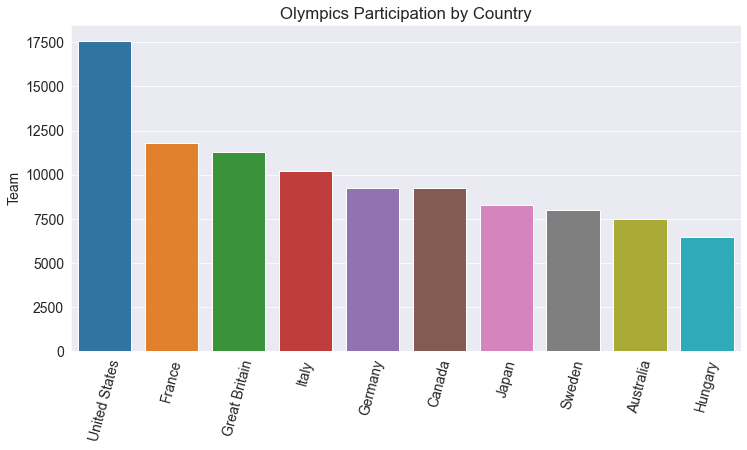

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Olympics Participation by Country')
sns.barplot(x=most_participation.index, y=most_participation);

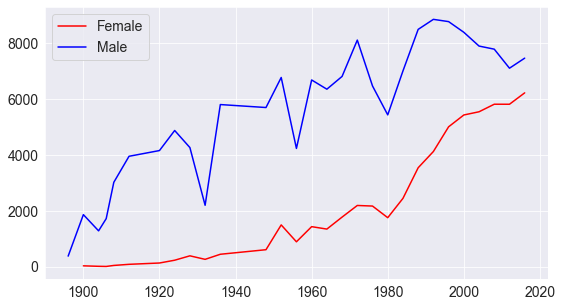

In [91]:
#Male and Female participation over the years 
analysisM = athletes_events[(athletes_events['Season'] =='Summer') & (athletes_events['Sex'] == 'M')].groupby(['Year']).count()[['Sex']]
analysisF = athletes_events[(athletes_events['Season'] =='Summer') & (athletes_events['Sex'] == 'F')].groupby(['Year']).count()[['Sex']]
plt.plot(analysisF, label= "Female", color="red")
plt.plot(analysisM, label= "Male", color="blue")
plt.legend(loc="upper left")
plt.show()

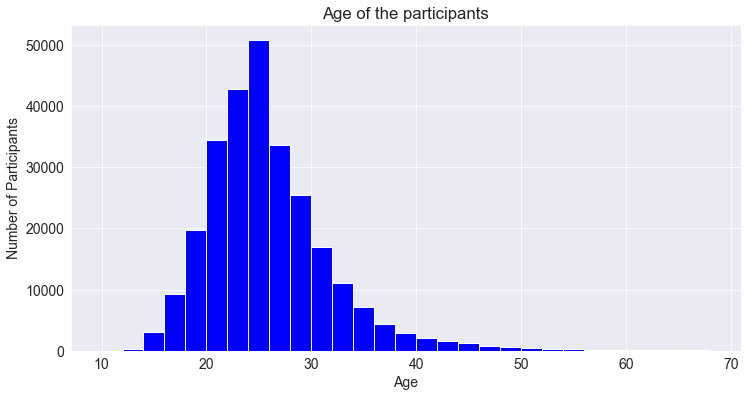

In [89]:
#print the histogram for Age
import numpy as np
plt.figure(figsize=(12, 6))
plt.title('Age of the participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')

plt.hist(athletes_events.Age, bins=np.arange(10,70,2), color='blue');